In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()



# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.summary()

model.compile(loss='MSE',
              optimizer='SGD',
              metrics=['mae','mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


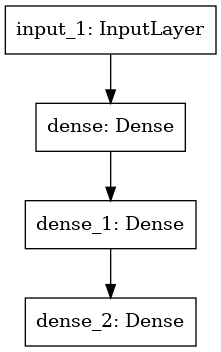

In [5]:
from tensorflow.keras import models, layers, utils, optimizers

utils.plot_model(model)


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=32,
                    validation_data=(test_data, test_labels))
                    

Epoch 1/200
13/13 [==============================] - 1s 13ms/step - loss: 434.7235 - mae: 18.1306 - mse: 434.7235 - val_loss: 421.2090 - val_mae: 18.4542 - val_mse: 421.2090
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 252.4763 - mae: 12.8912 - mse: 252.4763 - val_loss: 236.1229 - val_mae: 13.5556 - val_mse: 236.1229
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 112.0360 - mae: 7.8261 - mse: 112.0360 - val_loss: 52.0712 - val_mae: 5.2057 - val_mse: 52.0712
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 52.2019 - mae: 4.8868 - mse: 52.2019 - val_loss: 120.5653 - val_mae: 7.9241 - val_mse: 120.5653
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 59.6815 - mae: 5.4966 - mse: 59.6815 - val_loss: 39.4656 - val_mae: 4.3665 - val_mse: 39.4656
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 32.8781 - mae: 3.9738 - mse: 32.8781 - val_loss: 33.9723 - val_mae: 3.8143 

13/13 [==============================] - 0s 3ms/step - loss: 4.9552 - mae: 1.6382 - mse: 4.9552 - val_loss: 15.9672 - val_mae: 2.4992 - val_mse: 15.9672
Epoch 51/200
13/13 [==============================] - 0s 3ms/step - loss: 5.4815 - mae: 1.7247 - mse: 5.4815 - val_loss: 16.4133 - val_mae: 2.5977 - val_mse: 16.4133
Epoch 52/200
13/13 [==============================] - 0s 3ms/step - loss: 6.0497 - mae: 1.7799 - mse: 6.0497 - val_loss: 16.1714 - val_mae: 2.5903 - val_mse: 16.1714
Epoch 53/200
13/13 [==============================] - 0s 3ms/step - loss: 6.1791 - mae: 1.8335 - mse: 6.1791 - val_loss: 17.5445 - val_mae: 2.8291 - val_mse: 17.5445
Epoch 54/200
13/13 [==============================] - 0s 3ms/step - loss: 7.9403 - mae: 1.9465 - mse: 7.9403 - val_loss: 16.1064 - val_mae: 2.5415 - val_mse: 16.1064
Epoch 55/200
13/13 [==============================] - 0s 3ms/step - loss: 4.3738 - mae: 1.6029 - mse: 4.3738 - val_loss: 25.6354 - val_mae: 3.4851 - val_mse: 25.6354
Epoch 56/200
13/1

13/13 [==============================] - 0s 3ms/step - loss: 2.0527 - mae: 1.0844 - mse: 2.0527 - val_loss: 14.1830 - val_mae: 2.3719 - val_mse: 14.1830
Epoch 149/200
13/13 [==============================] - 0s 3ms/step - loss: 2.7821 - mae: 1.2513 - mse: 2.7821 - val_loss: 16.2415 - val_mae: 2.7375 - val_mse: 16.2415
Epoch 150/200
13/13 [==============================] - 0s 3ms/step - loss: 2.0835 - mae: 1.0780 - mse: 2.0835 - val_loss: 15.0691 - val_mae: 2.4830 - val_mse: 15.0691
Epoch 151/200
13/13 [==============================] - 0s 3ms/step - loss: 3.1718 - mae: 1.3184 - mse: 3.1718 - val_loss: 16.4757 - val_mae: 2.6587 - val_mse: 16.4757
Epoch 152/200
13/13 [==============================] - 0s 3ms/step - loss: 3.1245 - mae: 1.3044 - mse: 3.1245 - val_loss: 13.9158 - val_mae: 2.3590 - val_mse: 13.9158
Epoch 153/200
13/13 [==============================] - 0s 3ms/step - loss: 2.0940 - mae: 1.0513 - mse: 2.0940 - val_loss: 14.9313 - val_mae: 2.4586 - val_mse: 14.9313
Epoch 154/20

In [7]:
history.history

{'loss': [434.7235107421875,
  252.47625732421875,
  112.03598022460938,
  52.201927185058594,
  59.68154525756836,
  32.878082275390625,
  19.622682571411133,
  27.711931228637695,
  22.137950897216797,
  29.10466957092285,
  14.06833553314209,
  12.862386703491211,
  16.48670196533203,
  12.385361671447754,
  10.788674354553223,
  9.683436393737793,
  21.846694946289062,
  15.509124755859375,
  10.65269660949707,
  7.344227313995361,
  8.689420700073242,
  18.31072425842285,
  13.06899642944336,
  7.168990135192871,
  9.83068561553955,
  7.555063247680664,
  8.338438987731934,
  8.54179859161377,
  9.415632247924805,
  8.074875831604004,
  7.378337383270264,
  7.520010471343994,
  5.5901594161987305,
  5.628615379333496,
  6.094149589538574,
  5.190131187438965,
  5.66432523727417,
  6.339138507843018,
  6.217055320739746,
  5.910255432128906,
  7.222177028656006,
  5.538332462310791,
  9.206338882446289,
  5.607603073120117,
  6.10267972946167,
  4.85418176651001,
  4.49438142776489

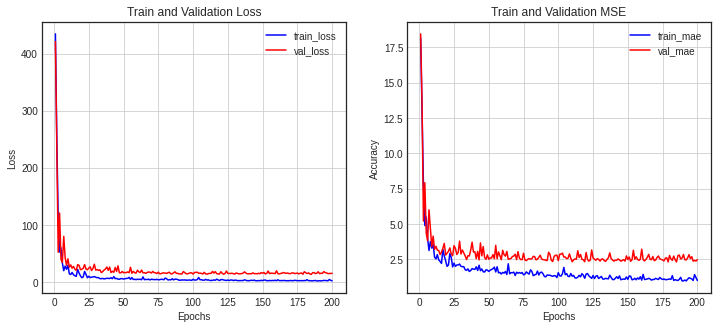

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 15.0686 - mae: 2.4669 - mse: 15.0686


[15.068620681762695, 2.466876983642578, 15.068620681762695]

# 회고 
 * 딥러닝 모델 평가를 해보았다.
 여러가지 막혔던 부분들이 있는데, 하나씩하나씩 해보고 나니, 질문도 해보고나니  알게되었다. 테스트 데이터와 검증데이터를 확실히 알고 해봐야 할것 같다. 여러 활성화 함수를 넣어봤는데, 각각 기능이 달랐던걸 알게되었다. 좀 더 공부와, 여러가지들을 해봐야 실력이 늘 것 같다. 